<a href="https://colab.research.google.com/github/Nokzendi/Neural_Network/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing DataSet

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


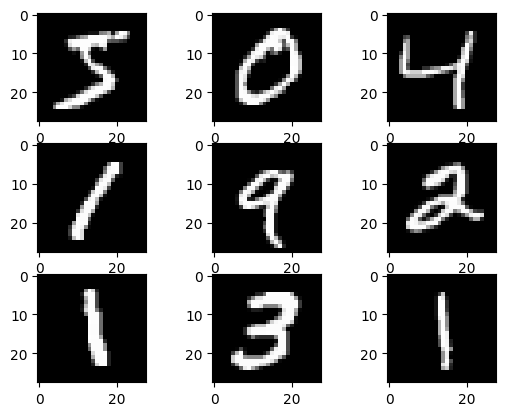

In [4]:
# example of loading the mnist dataset
import numpy as np
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import keras

# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

# Loading the Data Set

In [5]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# Preparing the Pixel Data

In [6]:
#convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

# Defining the Model

In [7]:
def create_cnn_model(neurons=128, activation='relu', optimizer='adam', learning_rate=0.01):
    input_layer = Input(shape=(28, 28, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
    pool1 = MaxPooling2D((2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
    pool2 = MaxPooling2D((2, 2))(conv2)
    flatten = Flatten()(pool2)
    dense1 = Dense(neurons, activation=activation)(flatten)
    dropout1 = Dropout(0.5)(dense1)
    output_layer = Dense(10, activation='softmax')(dropout1)

    model = Model(inputs=input_layer, outputs=output_layer)

    if optimizer == 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer.")

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# HyperParameter Tuning

In [10]:
# Wrap your create_cnn_model function in a KerasClassifier
model = KerasClassifier(build_fn=create_cnn_model)

# Define the parameter grid
param_grid = {
    'neurons': [int(x) for x in np.linspace(start=10, stop=100, num=10)],
    'activation': ['relu', 'sigmoid', 'tanh'],
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
    'batch_size': [50, 100, 200, 300, 400],
    'epochs': [1, 5, 10, 15]
}

# Create and fit the RandomizedSearchCV instance
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3)
random_search.fit(train_norm, trainY)

# Print the best parameters and score
print("Best hyperparameters:")
print(random_search.best_params_)
print("Best score:", random_search.best_score_)

<ipython-input-10-ea3168d538a9>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_cnn_model)


Epoch 1/5
200/200 [==============================] - 34s 165ms/step - loss: 0.4654 - accuracy: 0.8689
Epoch 2/5
200/200 [==============================] - 36s 179ms/step - loss: 0.1678 - accuracy: 0.9546
Epoch 3/5
200/200 [==============================] - 34s 170ms/step - loss: 0.1277 - accuracy: 0.9649
Epoch 4/5
200/200 [==============================] - 33s 163ms/step - loss: 0.1146 - accuracy: 0.9666
Epoch 5/5
100/100 [==============================] - 6s 57ms/step - loss: 0.0508 - accuracy: 0.9857
Epoch 1/5
200/200 [==============================] - 36s 180ms/step - loss: 0.8267 - accuracy: 0.7447
Epoch 2/5
200/200 [==============================] - 33s 164ms/step - loss: 0.2703 - accuracy: 0.9175
Epoch 3/5
200/200 [==============================] - 33s 167ms/step - loss: 0.1865 - accuracy: 0.9444
Epoch 4/5
200/200 [==============================] - 33s 167ms/step - loss: 0.1555 - accuracy: 0.9524
Epoch 5/5
100/100 [==============================] - 4s 42ms/step - loss: 0.0571 - a

KeyboardInterrupt: ignored

# Create & Train the model

In [13]:
# Create and train the model
#best_hyperparameters = random_search.best_params_
#non_mc_dropout_model = create_cnn_model(**best_hyperparameters)
non_mc_dropout_model = create_cnn_model()
non_mc_dropout_model.fit(train_norm, trainY, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 52s 68ms/step - loss: 0.2254 - accuracy: 0.9318 - val_loss: 0.0861 - val_accuracy: 0.9748
Epoch 2/10
750/750 [==============================] - 50s 67ms/step - loss: 0.1268 - accuracy: 0.9635 - val_loss: 0.0740 - val_accuracy: 0.9816
Epoch 3/10
750/750 [==============================] - 48s 64ms/step - loss: 0.1173 - accuracy: 0.9676 - val_loss: 0.0655 - val_accuracy: 0.9824
Epoch 4/10
750/750 [==============================] - 51s 68ms/step - loss: 0.1134 - accuracy: 0.9686 - val_loss: 0.0636 - val_accuracy: 0.9852
Epoch 5/10
750/750 [==============================] - 51s 68ms/step - loss: 0.1048 - accuracy: 0.9706 - val_loss: 0.0777 - val_accuracy: 0.9788
Epoch 6/10
750/750 [==============================] - 50s 66ms/step - loss: 0.0971 - accuracy: 0.9718 - val_loss: 0.0657 - val_accuracy: 0.9838
Epoch 7/10
750/750 [==============================] - 50s 67ms/step - loss: 0.1034 - accuracy: 0.9714 - val_loss: 0.0737 - val_accuracy:

# TSNE Plot For Non-MC Dropout Model

313/313 [==============================] - 4s 11ms/step


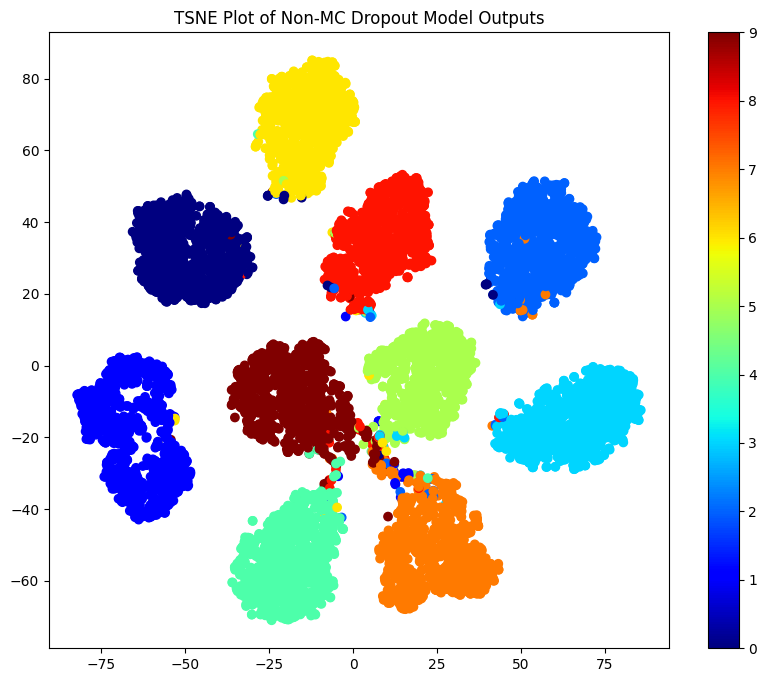

In [14]:
# Remove the final layer of the Non-MC dropout model
feature_extractor = Model(inputs=non_mc_dropout_model.inputs, outputs=non_mc_dropout_model.layers[-2].output)

# Get the intermediate representations for the test data
intermediate_output = feature_extractor.predict(test_norm)

# Perform TSNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_output = tsne.fit_transform(intermediate_output)

# Plot the TSNE plot
plt.figure(figsize=(10, 8))
plt.scatter(tsne_output[:, 0], tsne_output[:, 1], c = testY.argmax(axis=1), cmap='jet')
plt.colorbar()
plt.title('TSNE Plot of Non-MC Dropout Model Outputs')
plt.show()

# Importing Fashion MNIST DataSet

4422102/4422102 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


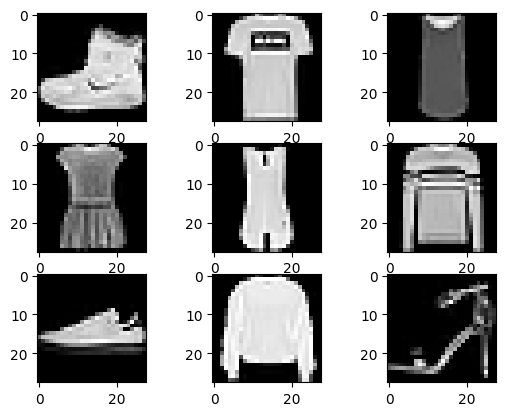

In [15]:
# load dataset
(trainX_fashion, trainy_fashion), (testX_fashion, testy_fashion) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX_fashion.shape, trainy_fashion.shape))
print('Test: X=%s, y=%s' % (testX_fashion.shape, testy_fashion.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX_fashion[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

# Loading the Data Set

In [16]:
# load dataset
(trainX_fashion, trainY_fashion), (testX_fashion, testY_fashion) = fashion_mnist.load_data()
# reshape dataset to have a single channel
trainX_fashion = trainX_fashion.reshape((trainX_fashion.shape[0], 28, 28, 1))
testX_fashion = testX_fashion.reshape((testX_fashion.shape[0], 28, 28, 1))

# one hot encode target values
trainY_fashion = to_categorical(trainY_fashion)
testY_fashion = to_categorical(testY_fashion)

# Preparing the Pixel Data

In [17]:
#convert from integers to floats
train_norm_fashion = trainX_fashion.astype('float32')
test_norm_fashion = testX_fashion.astype('float32')
# normalize to range 0-1
train_norm_fashion = train_norm_fashion / 255.0
test_norm_fashion = test_norm_fashion / 255.0

# Predict on Fashion MNIST

In [18]:
def predict_with_uncertainty(model, x, n_samples=10):
    result = np.zeros((n_samples, x.shape[0], 10))
    for i in range(n_samples):
        predictions = model.predict(x, batch_size=64)
        result[i] = predictions
    prediction_mean = np.mean(result, axis=0)
    prediction_std = np.std(result, axis=0)
    return prediction_mean, prediction_std

# Accuracy,Uncertainty on MNIST - Non-MC DropOut Model

In [19]:
# Predict with uncertainty using MC dropout model
n_samples = 20
prediction_mean, prediction_std = predict_with_uncertainty(non_mc_dropout_model, test_norm, n_samples)

# Calculate predictive accuracy
predicted_labels = np.argmax(prediction_mean, axis=1)
true_labels = np.argmax(testY, axis=1)
accuracy = np.mean(predicted_labels == true_labels)
print("Predictive Accuracy on Fashion MNIST: {:.2f}%".format(accuracy * 100))

157/157 [==============================] - 3s 16ms/step
Predictive Accuracy on Fashion MNIST: 98.42%


# TSNE Plot Pattern for MNIST & Fashion MNIST

In [23]:
# Combine MNIST and Fashion MNIST data and labels
combined_data = np.concatenate((train_norm, train_norm_fashion), axis=0)
combined_labels = np.concatenate((testY, testY_fashion), axis=0)

# Get intermediate representations for combined data using the Non-MC dropout model
combined_intermediate_output = feature_extractor.predict(combined_data)

# Perform TSNE dimensionality reduction for combined data
tsne = TSNE(n_components=2, random_state=42)
combined_tsne_output = tsne.fit_transform(combined_intermediate_output)

# Plot the TSNE plot for combined data
plt.figure(figsize=(10, 8))
plt.scatter(combined_tsne_output[:, 0], combined_tsne_output[:, 1], c=combined_labels.argmax(axis=1), cmap='jet')
plt.colorbar()
plt.title('TSNE Plot of Non-MC Dropout Model Outputs for MNIST + Fashion MNIST')
plt.show()

3750/3750 [==============================] - 42s 11ms/step


KeyboardInterrupt: ignored

# Defining MC DropOut Model

In [20]:
def create_mc_dropout_model():
    input_layer = Input(shape=(28, 28, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
    dropout1 = Dropout(0.25)(conv1)
    pool1 = MaxPooling2D((2, 2))(dropout1)
    conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
    dropout2 = Dropout(0.25)(conv2)
    pool2 = MaxPooling2D((2, 2))(dropout2)
    flatten = Flatten()(pool2)
    dense1 = Dense(128, activation='relu')(flatten)
    dropout3 = Dropout(0.5)(dense1)
    output_layer = Dense(10, activation='softmax')(dropout3)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create & Train The Model

In [21]:
# Create and train the MC dropout model
mc_dropout_model = create_mc_dropout_model()
mc_dropout_model.fit(train_norm, trainY, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 75s 99ms/step - loss: 0.2842 - accuracy: 0.9118 - val_loss: 0.0944 - val_accuracy: 0.9783
Epoch 2/10
750/750 [==============================] - 74s 99ms/step - loss: 0.1063 - accuracy: 0.9684 - val_loss: 0.0639 - val_accuracy: 0.9849
Epoch 3/10
750/750 [==============================] - 72s 96ms/step - loss: 0.0800 - accuracy: 0.9764 - val_loss: 0.0511 - val_accuracy: 0.9872
Epoch 4/10
750/750 [==============================] - 77s 102ms/step - loss: 0.0626 - accuracy: 0.9809 - val_loss: 0.0428 - val_accuracy: 0.9883
Epoch 5/10
750/750 [==============================] - 79s 106ms/step - loss: 0.0565 - accuracy: 0.9829 - val_loss: 0.0379 - val_accuracy: 0.9893
Epoch 6/10
750/750 [==============================] - 72s 96ms/step - loss: 0.0487 - accuracy: 0.9850 - val_loss: 0.0344 - val_accuracy: 0.9904
Epoch 7/10
750/750 [==============================] - 72s 96ms/step - loss: 0.0454 - accuracy: 0.9865 - val_loss: 0.0370 - val_accurac

# Perfomance on test-data MC & Non-MC DropOut

In [22]:
def evaluate_model(model, x_test, y_test):
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print("Loss: {:.4f}, Accuracy: {:.2f}%".format(loss, accuracy * 100))

print("Non-MC Dropout MNIST Model:")
evaluate_model(non_mc_dropout_model, test_norm, testY)

print("MC Dropout MNIST Model:")
evaluate_model(mc_dropout_model, test_norm, testY)

print("Non-MC Dropout Fashion-MNIST Model:")
evaluate_model(non_mc_dropout_model, test_norm_fashion, testY_fashion)

print("MC Dropout Fashion-MNIST Model:")
evaluate_model(mc_dropout_model, test_norm_fashion, testY_fashion)

Non-MC Dropout MNIST Model:
Loss: 0.0777, Accuracy: 98.42%
MC Dropout MNIST Model:
Loss: 0.0218, Accuracy: 99.27%
Non-MC Dropout Fashion-MNIST Model:
Loss: 6.3931, Accuracy: 13.46%
MC Dropout Fashion-MNIST Model:
Loss: 4.0307, Accuracy: 7.61%
